### Checking the dataset

This Jupyter notebook is for checking if everything is in place in the data for the model development

In [ ]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

In [2]:
fraud = pd.read_csv("complete_dataset.csv")

In [3]:
fraud.head()

,TransactionID,Timestamp,MerchantID,Amount,CustomerID,TransactionAmount,AnomalyScore,FraudIndicator,Category,MerchantName,MerchantLocation,CustomerName,CustomerAge,CustomerAddress
0,1,2022-01-01 00:00:00,2701,55.530334,1952,79.413607,0.686699,0,Other,Merchant 2701,Location 2701,Customer 1952,50,Address 1952
1,2,2022-01-01 01:00:00,2070,12.881180,1027,12.053087,0.081749,0,Online,Merchant 2070,Location 2070,Customer 1027,46,Address 1027
2,3,2022-01-01 02:00:00,2238,50.176322,1955,33.310357,0.023857,0,Travel,Merchant 2238,Location 2238,Customer 1955,34,Address 1955
3,4,2022-01-01 03:00:00,2879,41.634001,1796,46.121117,0.876994,0,Travel,Merchant 2879,Location 2879,Customer 1796,33,Address 1796
4,5,2022-01-01 04:00:00,2966,78.122853,1946,54.051618,0.034059,0,Other,Merchant 2966,Location 2966,Customer 1946,18,Address 1946


In [ ]:
# finding the count of NA's in each column, if any
na_counts = fraud.isna().sum()
na_counts

TransactionID        0
Timestamp            0
MerchantID           0
Amount               0
CustomerID           0
TransactionAmount    0
AnomalyScore         0
FraudIndicator       0
Category             0
MerchantName         0
MerchantLocation     0
CustomerName         0
CustomerAge          0
CustomerAddress      0
dtype: int64

In [5]:
class_counts = fraud["FraudIndicator"].value_counts()
print("Value counts for the Fraud Indicator variable are as follows:")
print(class_counts)

Value counts for the Fraud Indicator variable are as follows:
FraudIndicator
0    955
1     45
Name: count, dtype: int64


In [ ]:
class_proportions = fraud["FraudIndicator"].value_counts(normalize=True) * 100
print("\nClass Proportions (%):")
print(class_proportions)


Class Proportions (%):
FraudIndicator
0    95.5
1     4.5
Name: proportion, dtype: float64


In [7]:
print(f"Dataset contains {fraud.shape[0]} rows and {fraud.shape[1]} columns.")

Dataset contains 1000 rows and 14 columns.


In [8]:
print("Data types of each column:")
print(fraud.dtypes)

Data types of each column:
TransactionID          int64
Timestamp             object
MerchantID             int64
Amount               float64
CustomerID             int64
TransactionAmount    float64
AnomalyScore         float64
FraudIndicator         int64
Category              object
MerchantName          object
MerchantLocation      object
CustomerName          object
CustomerAge            int64
CustomerAddress       object
dtype: object


In [ ]:
# Summary statistics for numerical columns
print("Statistical Summary for Numerical Columns:")
print(fraud.describe())

# Summary statistics for categorical columns
print("Unique values in categorical columns:")
categorical_cols = fraud.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"{col}: {fraud[col].nunique()} unique values")

Statistical Summary for Numerical Columns:
       TransactionID   MerchantID       Amount   CustomerID  \
count    1000.000000  1000.000000  1000.000000  1000.000000   
mean      500.500000  2504.701000    55.394871  1496.626000   
std       288.819436   288.414883    25.070809   289.229047   
min         1.000000  2001.000000    10.006933  1001.000000   
25%       250.750000  2254.500000    34.502315  1239.000000   
50%       500.500000  2500.500000    57.844325  1501.000000   
75%       750.250000  2761.250000    75.858576  1739.250000   
max      1000.000000  3000.000000    99.887410  2000.000000   

       TransactionAmount  AnomalyScore  FraudIndicator  CustomerAge  
count        1000.000000   1000.000000     1000.000000  1000.000000  
mean           55.853826      0.492282        0.045000    39.848000  
std            26.093606      0.288423        0.207408    13.074932  
min            10.057864      0.000234        0.000000    18.000000  
25%            33.875129      0.251802 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
print(fraud.columns)

Index(['TransactionID', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'TransactionAmount', 'AnomalyScore', 'FraudIndicator', 'Category',
       'MerchantName', 'MerchantLocation', 'CustomerName', 'CustomerAge',
       'CustomerAddress'],
      dtype='object')


In [23]:
selected_columns = ["CustomerAge", "TransactionAmount", "AnomalyScore", "Amount"]

# Ensure the selected columns exist in the DataFrame
numeric_cols = fraud[selected_columns]

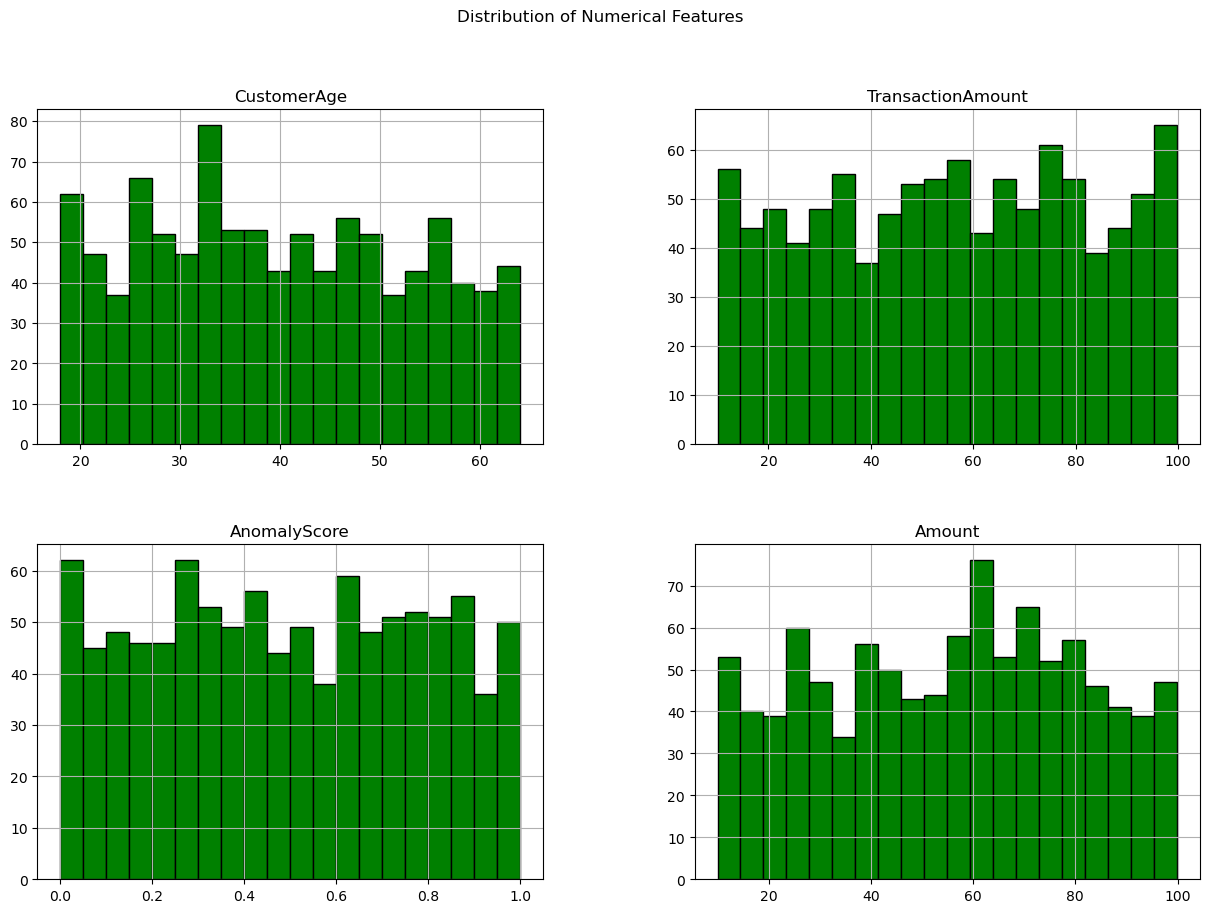

In [ ]:
numeric_cols.hist(bins=20, figsize=(15, 10), color="green", edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

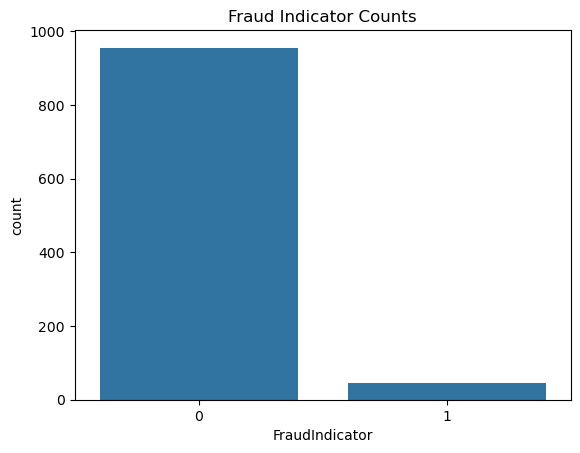

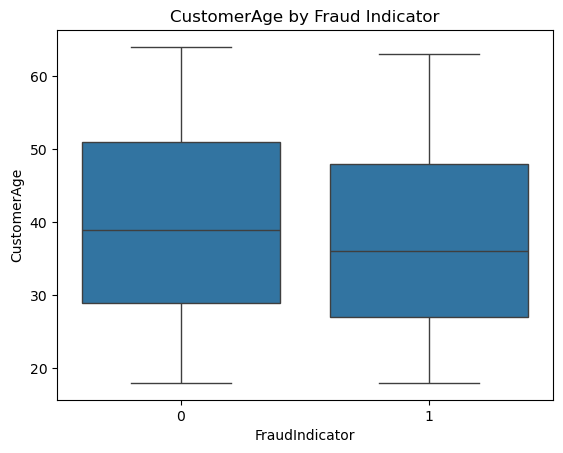

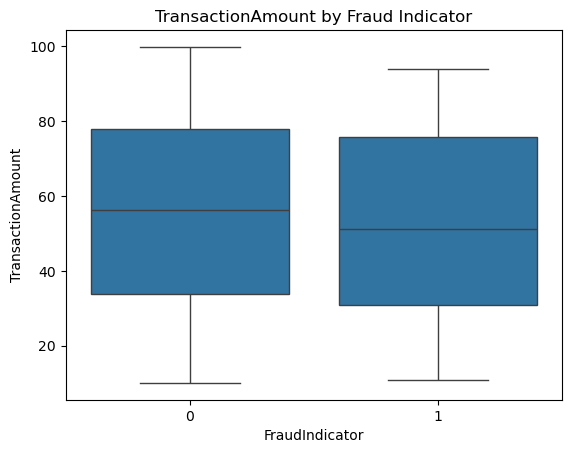

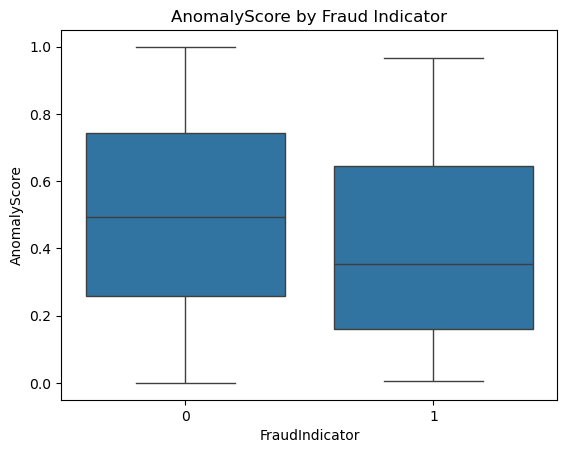

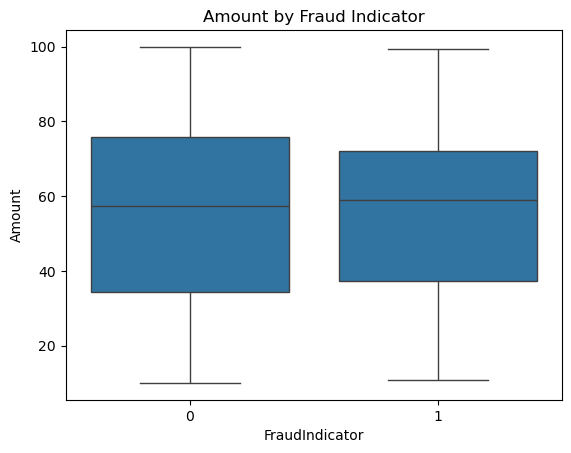

In [ ]:
# Countplot for FraudIndicator
sns.countplot(x="FraudIndicator", data=fraud)
plt.title("Fraud Indicator Counts")
plt.show()

# Boxplots for numerical columns by FraudIndicator
for col in numeric_cols:
    sns.boxplot(x="FraudIndicator", y=col, data=fraud)
    plt.title(f"{col} by Fraud Indicator")
    plt.show()

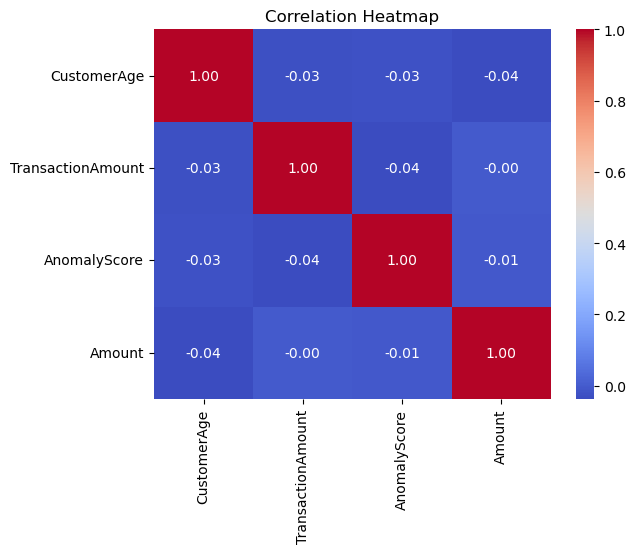

In [26]:
# Correlation heatmap
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()